# Semantic segmentation test

---

**Author:** [rodoart](https://github.com/rodoart/)<br>
**Date created:** 2021/08/05<br>
**Last modified:** 2021/08/05<br>
**Description:** 
Trying DVC+Google Drive. 
Testing the library [semantic-segmentation by sithu31296](https://github.com/sithu31296/semantic-segmentation)


## Libraries

In [70]:
import sys
import subprocess
import pkg_resources

required = {
    'dvc', 'dvc[gdrive]', 'gdown', 'torch'
}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)


## Download repository files

### GitHub

In [2]:
!git clone https://github.com/rodoart/pet-surveillance

Cloning into 'pet-surveillance'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 262 (delta 129), reused 236 (delta 103), pack-reused 0
Receiving objects: 100% (262/262), 7.65 MiB | 29.13 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [68]:
import os
os.chdir('pet-surveillance')


### DVC

In [16]:
!dvc pull data/processed/semantic_segmentation/unity_residential_interiors

Se truncaron las últimas líneas 5000 del resultado de transmisión.
3551272e448e5096771756bbaf94f8:   0% 0.00/19.1k [00:00<?, ?B/s{'info': ''}]     
                                                                           
!
  0%|          |6fd46d8c41cff249ea085c19598778     0.00/? [00:00<?,        ?B/s]
6fd46d8c41cff249ea085c19598778:   0% 0.00/18.2k [00:00<?, ?B/s{'info': ''}]     
                                                                           
!
  0%|          |2a0e0906072d13dd6bfb41e2386f94     0.00/? [00:00<?,        ?B/s]
2a0e0906072d13dd6bfb41e2386f94:   0% 0.00/2.87M [00:00<?, ?B/s{'info': ''}]     
                                                                           
!
  0%|          |af5b8a7a89961a11cc2b17cababa74     0.00/? [00:00<?,        ?B/s]
af5b8a7a89961a11cc2b17cababa74:   0% 0.00/2.66M [00:00<?, ?B/s{'info': ''}]     
 38% 756/2.00k [00:12<00:25, 48.8file/s{'info': ' /content/pet-surveillance/data/processed/semantic_segmentation/unity_residential_i

### Path function

In [71]:
import sys
sys.path.append('.')

In [75]:
from pet_surveillance.utils.paths import make_dir_function

In [76]:
local_dir = make_dir_function()

## Testing semantic-segmentation library

### Setup

In [81]:
clone_dir = local_dir('tmp', 'semantic_segmentation' )

In [82]:
!git clone https://github.com/sithu31296/semantic-segmentation $clone_dir

Cloning into '/content/pet-surveillance/tmp/semantic_segmentation'...
remote: Enumerating objects: 792, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 792 (delta 11), reused 39 (delta 11), pack-reused 753
Receiving objects: 100% (792/792), 55.00 MiB | 27.16 MiB/s, done.
Resolving deltas: 100% (462/462), done.


In [83]:
%pip install -e $clone_dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/pet-surveillance/tmp/semantic_segmentation
  Attempting uninstall: semseg
    Found existing installation: semseg 0.4.1
    Can't uninstall 'semseg'. No files were found to uninstall.
  Running setup.py develop for semseg


In [84]:
import torch
from torchvision import io
from torchvision import transforms as T
from PIL import Image

def show_image(image):
    if image.shape[2] != 3: image = image.permute(1, 2, 0)
    image = Image.fromarray(image.numpy())
    return image

### Show Available Pretrained Models

In [85]:
from semseg import show_models

show_models()

  No.  Model Names
-----  -------------
    1  SegFormer
    2  Lawin
    3  SFNet
    4  BiSeNetv1
    5  DDRNet
    6  FCHarDNet
    7  BiSeNetv2


### Load a Pretrained Model

Download a pretrained model's weights from the result table (ADE20K, CityScapes, ...) and put it in `checkpoints/pretrained/model_name/`.

In [88]:
from pathlib import Path

ckpt = local_dir('models','segformer')
ckpt.mkdir(exist_ok=True, parents=True)

url = 'https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT'
segformer_path = ckpt.joinpath('segformer.b3.ade.pth')

gdown.download(url, str(segformer_path), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-OmW3xRD3WAbJTzktPC-VMOF5WMsN8XT
To: /content/pet-surveillance/models/segformer/segformer.b3.ade.pth

  0%|          | 0.00/190M [00:00<?, ?B/s]
  9%|▉         | 17.8M/190M [00:00<00:00, 175MB/s]
 19%|█▉        | 36.2M/190M [00:00<00:00, 179MB/s]
 30%|███       | 57.1M/190M [00:00<00:00, 192MB/s]
 40%|████      | 76.5M/190M [00:00<00:00, 187MB/s]
 51%|█████     | 96.5M/190M [00:00<00:00, 191MB/s]
 61%|██████    | 116M/190M [00:00<00:00, 191MB/s] 
 71%|███████▏  | 135M/190M [00:00<00:00, 171MB/s]
 81%|████████  | 153M/190M [00:00<00:00, 152MB/s]
 89%|████████▉ | 169M/190M [00:01<00:00, 128MB/s]
100%|██████████| 190M/190M [00:01<00:00, 160MB/s]


'/content/pet-surveillance/models/segformer/segformer.b3.ade.pth'

In [90]:
from semseg.models import *

model = eval('SegFormer')(
    backbone='MiT-B3',
    num_classes=150
)

try:
    model.load_state_dict(torch.load(segformer_path, map_location='cpu'))
except:
    print("Download a pretrained model's weights from the result table.")
model.eval()

print('Loaded Model')

Loaded Model


### Simple Image Inference

#### Load Image

In [91]:
image_path = local_dir('data','processed','semantic_segmentation','unity_residential_interiors','val_images','1027.png')

torch.Size([3, 1080, 1920])


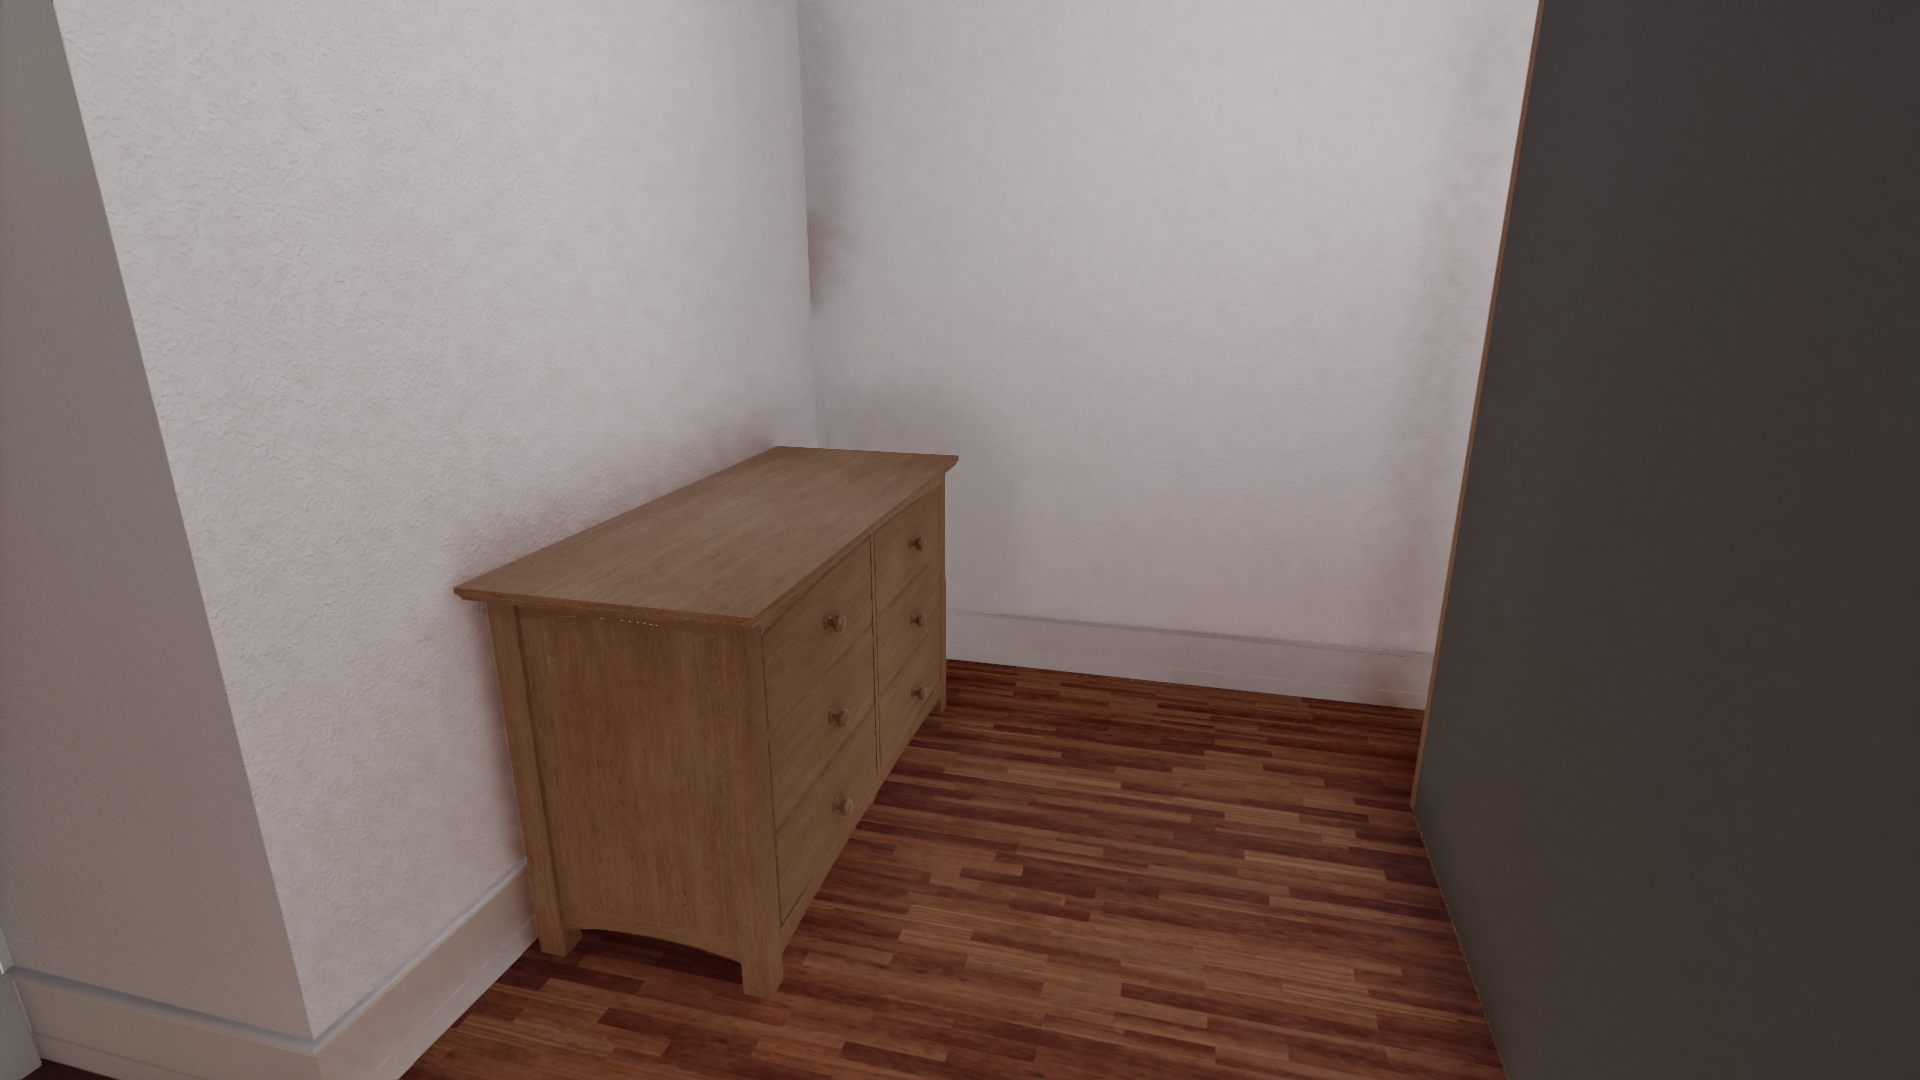

In [109]:
image = io.read_image(str(image_path))
image = image[:3,:,:]
print(image.shape)
original_shape = image.shape[1:]
show_image(image)

#### Preprocess

In [110]:
# resize
image = T.Resize((512, 512))(image)
# scale to [0.0, 1.0]
image = image.float() / 255
# normalize
image = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(image)
# add batch size
image = image.unsqueeze(0)
image.shape

torch.Size([1, 3, 512, 512])

### Model Forward

In [95]:
with torch.inference_mode():
    seg = model(image)
seg.shape

torch.Size([1, 150, 512, 512])

#### Postprocess

In [96]:
seg = seg.softmax(1).argmax(1).to(int)
seg.unique()

tensor([ 0,  3, 10, 44])

In [97]:
from semseg.datasets import *

palette = eval('ADE20K').PALETTE

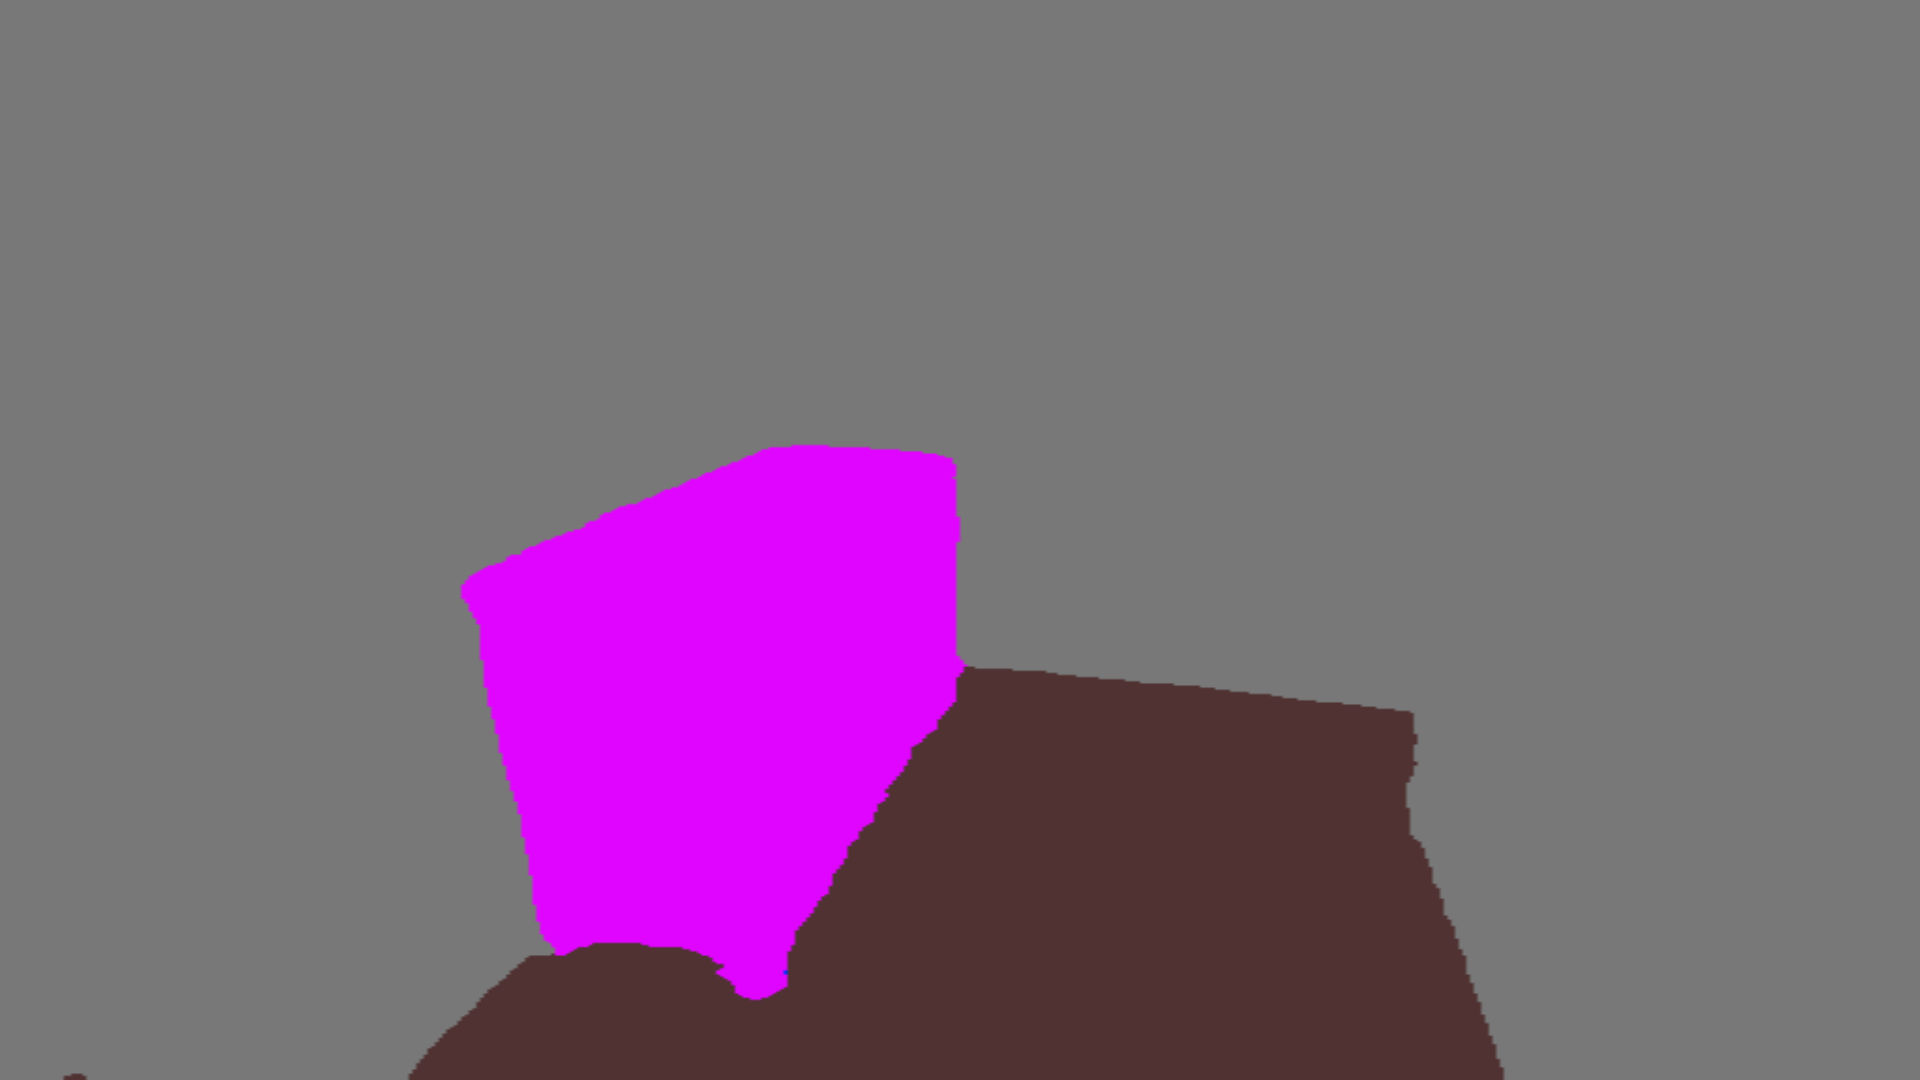

In [111]:
seg_map = palette[seg].squeeze().to(torch.uint8)
img = show_image(seg_map)
T.Resize(original_shape)(img)